In [1]:
import pandas as pd

In [2]:
airbnb = pd.read_csv('data/airbnb.csv')

In [3]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [4]:
airbnb.room_type.value_counts()

Entire home/apt    9764
Private room       3297
Shared room         171
Name: room_type, dtype: int64

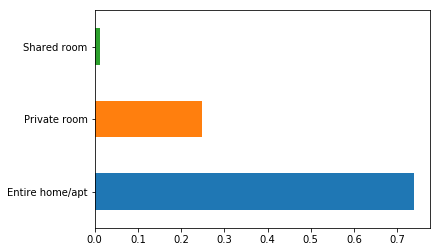

In [6]:
airbnb.room_type.value_counts(normalize=True).plot.barh();

In [6]:
airbnb.room_id.value_counts().head()

4524031     1
17331115    1
5568673     1
17187773    1
5464935     1
Name: room_id, dtype: int64

In [7]:
airbnb.neighborhood.value_counts()

Santa Maria Maior          2798
Misericórdia               2402
Arroios                    1664
Santo António              1105
São Vicente                1041
Estrela                     803
Avenidas Novas              566
Penha de França             407
Campo de Ourique            319
Areeiro                     280
Belém                       254
Alvalade                    253
Parque das Nações           250
Alcântara                   213
São Domingos de Benfica     138
Lumiar                      124
Campolide                   123
Olivais                     108
Ajuda                       108
Beato                        84
Benfica                      71
Marvila                      51
Carnide                      47
Santa Clara                  23
Name: neighborhood, dtype: int64

In [10]:
niche_neigh = airbnb.neighborhood.value_counts()[
    airbnb.neighborhood.value_counts()<100].index

In [13]:
airbnb['neighborhood_type'] = airbnb.neighborhood
airbnb["neighborhood_type"][airbnb.neighborhood.isin(niche_neigh)] = "Other"
airbnb.neighborhood_type.value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Santa Maria Maior          2798
Misericórdia               2402
Arroios                    1664
Santo António              1105
São Vicente                1041
Estrela                     803
Avenidas Novas              566
Penha de França             407
Campo de Ourique            319
Areeiro                     280
Other                       276
Belém                       254
Alvalade                    253
Parque das Nações           250
Alcântara                   213
São Domingos de Benfica     138
Lumiar                      124
Campolide                   123
Olivais                     108
Ajuda                       108
Name: neighborhood_type, dtype: int64

In [14]:
n_records = len(airbnb)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(airbnb)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0007557436517533253 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64
neighborhood_type | 0.0 | object


In [15]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airbnb)

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


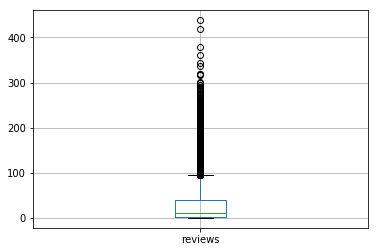

In [10]:
airbnb.boxplot('reviews');

In [11]:
airbnb.accommodates.value_counts().tail()

12    64
11    37
14    22
15    18
13    10
Name: accommodates, dtype: int64

In [12]:
airbnb.drop(columns=['room_id']).head()

,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [13]:
airbnb.host_id.value_counts().head()

3953109      171
1756107       98
106149355     86
2174752       68
2010790       63
Name: host_id, dtype: int64

In [26]:
airbnb_by_neigh = airbnb.groupby(['neighborhood'], as_index=True)['price'].mean()
airbnb_by_neigh.sort_values(ascending=False)

neighborhood
Benfica                    270.816901
Carnide                    229.829787
São Domingos de Benfica    203.152174
Parque das Nações          110.456000
Campo de Ourique           102.275862
Areeiro                     93.796429
Lumiar                      93.701613
Misericórdia                93.097002
Estrela                     89.264010
Santa Maria Maior           86.923159
Santo António               83.558371
Avenidas Novas              81.489399
Marvila                     81.196078
Belém                       80.523622
Campolide                   79.764228
São Vicente                 75.732949
Arroios                     73.039663
Alcântara                   72.582160
Alvalade                    70.098814
Penha de França             64.493857
Ajuda                       63.435185
Olivais                     61.824074
Beato                       45.845238
Santa Clara                 45.000000
Name: price, dtype: float64

In [27]:
airbnb['reviews_type'] = "None"
airbnb['reviews_type'][(airbnb['reviews'] <=10)] = "Some"
airbnb['reviews_type'][(airbnb['reviews'] <=50)] = "Many"
airbnb['reviews_type'][(airbnb['reviews'] > 50)] = "Wow"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
airbnb.reviews_type = airbnb.reviews_type.astype("category")
airbnb.neighborhood_type = airbnb.reviews_type.astype('category')

In [30]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,neighborhood_type,reviews_type
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,Belém,Many
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,Alvalade,Many
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,Santa Maria Maior,Wow
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,Santa Maria Maior,Wow
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,Santa Maria Maior,Wow


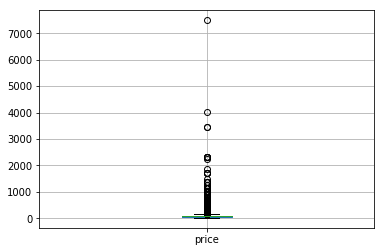

In [29]:
airbnb.boxplot('price');

In [33]:
airbnb.to_pickle('data/airbnb_grouped.pkl')

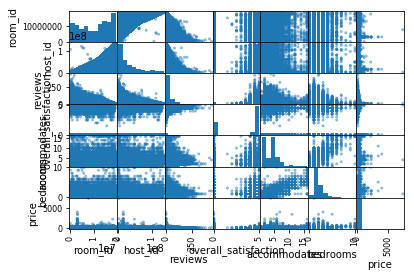

In [34]:
pd.plotting.scatter_matrix(airbnb.select_dtypes([int, float]));

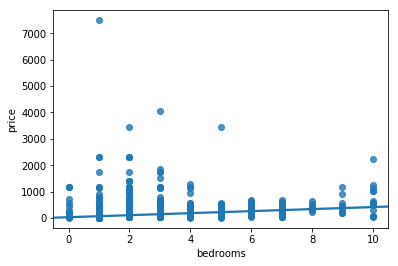

In [36]:
import seaborn as sns
sns.regplot("bedrooms", "price", data=airbnb);